In [0]:
# 导入工具包 numpy pandas用于数据处理  
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline
#装载云盘
from google.colab import drive
drive.mount('/content/drive')
#4/0gGWXSIkWyeDRybf6nE7qmxInTrQFyMoAUdUAI-YlSwDJat0W56PtPE

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#读取数据
df = pd.read_csv('/content/drive/My Drive/colab/5G_contest/train.csv')
#df = shuffle(df)
df.shape
#df.info()
#df['is_5g'].value_counts()

(700000, 60)

In [0]:
#进行数据归一化
is_5g=df.is_5g
nouse=['area_id','user_id','prov_id','is_5g']
df=df.drop(nouse,axis=1)
#df=df[use]
#min_max_scaler = preprocessing.MinMaxScaler()
#df01= min_max_scaler.fit_transform(df)
#df= pd.DataFrame(df01,columns=df.columns)
df=pd.concat([df,is_5g],axis=1)
df.head()

,chnl_type,service_type,product_type,innet_months,total_times,total_flux,total_fee,pay_fee,sex,age,manu_name,term_type,max_rat_flag,is_5g_base_cover,is_work_5g_cover,is_home_5g_cover,is_work_5g_cover_l01,is_home_5g_cover_l01,is_work_5g_cover_l02,is_home_5g_cover_l02,activity_type,is_act_expire,comp_type,call_days,re_call10,short_call10,long_call10,bank_cnt,active_days01,active_days02,active_days03,active_days04,active_days05,active_days06,active_days07,active_days08,active_days09,active_days10,active_days11,active_days12,active_days13,active_days14,active_days15,active_days16,active_days17,active_days18,active_days19,active_days20,active_days21,active_days22,active_days23,game_app_flux,live_app_flux,video_app_flux,city_5g_ratio,city_level,is_5g
0,7,4,5,29,1.149441,10.864754,93.000,550.0,1,25,3,4,4,0,0,0,0,0,0,0,4,1,1,25.625000,0.500000,18.250000,0.500000,8.750,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,18.0,0.0,0.0,0.0,0.0,2.0,0.0,28.0,4.0,2.0,0.0,0.0,0.0,0.00000,5526.494937,0.000512,7.0,1.0
1,7,4,3,5,0.688337,6.814911,89.912,580.0,1,26,6,4,4,0,0,0,0,0,0,0,4,1,1,21.142857,5.285714,11.571429,3.857143,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.00000,0.000000,0.000356,3.0,0.0
2,7,4,4,104,1.102318,9.492543,62.670,710.0,0,32,5,4,4,1,1,1,1,1,1,1,3,2,6,29.875000,114.625000,54.500000,3.875000,71.125,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,25.0,0.0,0.0,0.0,0.0,3.0,0.0,17.0,0.0,3.0,0.0,0.0,0.0,0.00000,1235.091633,0.000490,3.0,0.0
3,10,4,5,15,0.122139,5.008418,75.798,90.0,0,37,1,1,4,0,0,0,0,0,0,0,5,3,6,14.000000,0.000000,2.000000,0.000000,0.000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,27.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,4.0,0.0,0.0,0.0,9.13548,1194.355876,0.000328,2.0,0.0
4,7,4,3,21,0.158738,9.745640,54.500,300.0,1,55,6,4,4,0,0,0,0,0,0,0,4,1,1,8.285714,0.142857,0.714286,2.571429,0.000,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,20.0,0.0,6.0,1.0,0.0,0.00000,26.783371,0.000830,6.0,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


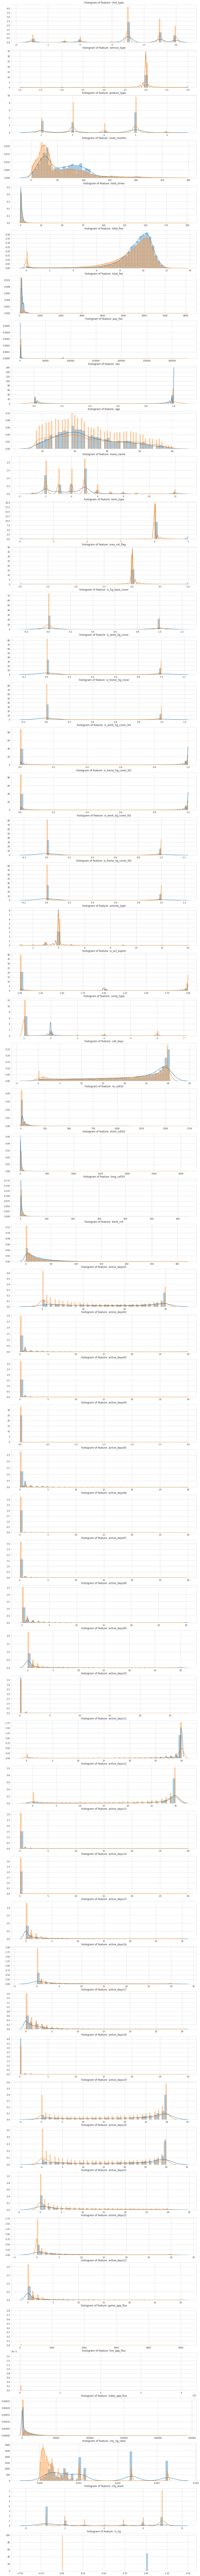

In [0]:
#Select only the anonymized features.
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
goal=df.iloc[:,:]
length=len(goal.iloc[1,:])
v_feat = goal.columns
plt.figure(figsize=(16,length*4))
gs = gridspec.GridSpec(length, 1)
for i, cn in enumerate(df[v_feat]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df["is_5g"] == 1], bins=50)
    sns.distplot(df[cn][df["is_5g"] == 0], bins=100)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))